# Analisi di una corsa da 10 km
In questa breve analisi vorrei spiegare il processo per importare i dati di una corsa da Garmin Connect e la loro visualizzazione con Pandas e Matplotlib.

Inizialmente importo le librerie di Pandas e Matplotlib, poi sfrutto il comando pd.read_csv di Pandas per importare il csv nel mio notebook.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

corsa=pd.read_csv("dati/activity_11056454360.csv")
corsa

,Lap,Tempo,Tempo cumulato,Distanza,Passo medio,GAP medio,FC Media,FC max,Ascesa totale,Discesa totale,...,Media bilanciamento TCS,Lunghezza media passo,Oscillazione verticale media,Rapporto verticale medio,Calorie,Temperatura med,Passo migliore,Cadenza di corsa max,Tempo in movimento,Passo medio in movimento
0,1,7:08.1,"7:08,1","1,00",7:08,NaN,135,149,NaN,NaN,...,NaN,"0,87",NaN,NaN,72,NaN,6:37,171,7:08,7:08
1,2,6:50.2,13:58,"1,00",6:50,NaN,150,154,7.0,13.0,...,NaN,"0,92",NaN,NaN,76,NaN,6:34,165,"6:50,2",6:50
2,3,6:46.5,20:45,"1,00",6:47,NaN,156,161,15.0,10.0,...,NaN,"0,93",NaN,NaN,77,NaN,6:24,161,"6:46,5",6:47
3,4,6:54.4,27:39,"1,00",6:54,NaN,157,163,11.0,13.0,...,NaN,"0,91",NaN,NaN,75,NaN,6:41,161,6:54,6:54
4,5,7:08.0,34:47,"1,00",7:08,NaN,157,161,11.0,9.0,...,NaN,"0,90",NaN,NaN,76,NaN,6:46,161,7:08,7:08
5,6,7:04.1,41:51,"1,00",7:04,NaN,160,164,7.0,NaN,...,NaN,"0,91",NaN,NaN,75,NaN,6:51,159,"7:04,1",7:04
6,7,7:10.3,49:02,"1,00",7:10,NaN,162,166,5.0,5.0,...,NaN,"0,89",NaN,NaN,77,NaN,6:51,161,7:10,7:10
7,8,7:04.4,56:06,"1,00",7:04,NaN,164,167,NaN,16.0,...,NaN,"0,90",NaN,NaN,77,NaN,6:49,161,7:04,7:04
8,9,6:59.8,1:03:06,"1,00",7:00,NaN,168,170,9.0,NaN,...,NaN,"0,90",NaN,NaN,78,NaN,6:47,163,"6:59,8",7:00
9,10,6:42.2,1:09:48,"1,00",6:42,NaN,171,177,NaN,2.0,...,NaN,"0,92",NaN,NaN,77,NaN,6:08,172,6:42,6:42


In [74]:
corsa=corsa.replace(",",".", regex=True)
corsa["Tempo"]="00:"+ corsa["Tempo"]
corsa

,Lap,Tempo,Tempo cumulato,Distanza,Passo medio,GAP medio,FC Media,FC max,Ascesa totale,Discesa totale,...,Media bilanciamento TCS,Lunghezza media passo,Oscillazione verticale media,Rapporto verticale medio,Calorie,Temperatura med,Passo migliore,Cadenza di corsa max,Tempo in movimento,Passo medio in movimento
0,1,00:7:08.1,7:08.1,1.00,7:08,NaN,135,149,NaN,NaN,...,NaN,0.87,NaN,NaN,72,NaN,6:37,171,7:08,7:08
1,2,00:6:50.2,13:58,1.00,6:50,NaN,150,154,7.0,13.0,...,NaN,0.92,NaN,NaN,76,NaN,6:34,165,6:50.2,6:50
2,3,00:6:46.5,20:45,1.00,6:47,NaN,156,161,15.0,10.0,...,NaN,0.93,NaN,NaN,77,NaN,6:24,161,6:46.5,6:47
3,4,00:6:54.4,27:39,1.00,6:54,NaN,157,163,11.0,13.0,...,NaN,0.91,NaN,NaN,75,NaN,6:41,161,6:54,6:54
4,5,00:7:08.0,34:47,1.00,7:08,NaN,157,161,11.0,9.0,...,NaN,0.90,NaN,NaN,76,NaN,6:46,161,7:08,7:08
5,6,00:7:04.1,41:51,1.00,7:04,NaN,160,164,7.0,NaN,...,NaN,0.91,NaN,NaN,75,NaN,6:51,159,7:04.1,7:04
6,7,00:7:10.3,49:02,1.00,7:10,NaN,162,166,5.0,5.0,...,NaN,0.89,NaN,NaN,77,NaN,6:51,161,7:10,7:10
7,8,00:7:04.4,56:06,1.00,7:04,NaN,164,167,NaN,16.0,...,NaN,0.90,NaN,NaN,77,NaN,6:49,161,7:04,7:04
8,9,00:6:59.8,1:03:06,1.00,7:00,NaN,168,170,9.0,NaN,...,NaN,0.90,NaN,NaN,78,NaN,6:47,163,6:59.8,7:00
9,10,00:6:42.2,1:09:48,1.00,6:42,NaN,171,177,NaN,2.0,...,NaN,0.92,NaN,NaN,77,NaN,6:08,172,6:42,6:42


In [75]:
corsa.dtypes

Lap                                       int64
Tempo                                    object
Tempo cumulato                           object
Distanza                                 object
Passo medio                              object
GAP medio                               float64
FC Media                                  int64
FC max                                    int64
Ascesa totale                           float64
Discesa totale                          float64
Potenza media                           float64
W/kg medio                              float64
Potenza max                             float64
W/kg massimo                            float64
Cadenza di corsa media                    int64
Tempo medio di contatto con il suolo    float64
Media bilanciamento TCS                 float64
Lunghezza media passo                    object
Oscillazione verticale media            float64
Rapporto verticale medio                float64
Calorie                                 

In [77]:
corsa["Tempo"]=pd.to_timedelta(corsa["Tempo"], )

In [79]:
corsa["Tempo"].sum()

Timedelta('0 days 01:09:48')

## Plot
Grafico sull'andamento del battito cardiaco all'interno di una singola corsa di 10k

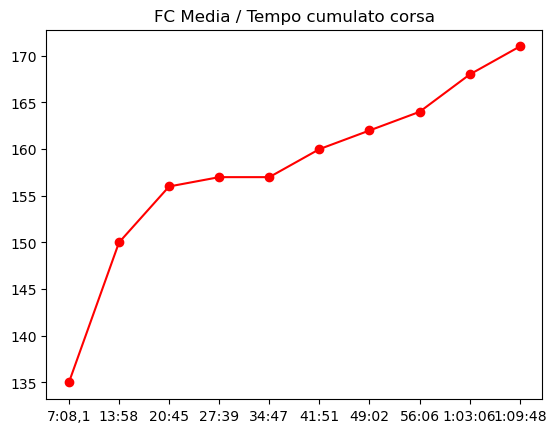

In [ ]:
km=corsa["Distanza"]
tempoCumulato=corsa["Tempo cumulato"]
fcmedia=corsa["FC Media"]
fig, ax = plt.subplots()
ax.plot(tempoCumulato,fcmedia, marker="o", color="red")
ax.set_title("FC Media / Tempo cumulato corsa")
plt.style.use("default")
plt.show()